# Fantasy Premier League

In [1]:
import numpy as np
import pandas as pd
import requests
import xlsxwriter
import math
import matplotlib.pyplot as plt


### Basic Classes
Class structure to hold api data
 - Player: Class which holds mini-league player data
 - Mini_League: Class which holds data for the mini league
 - Gameweek: Each gameweek information

In [10]:
class Player:
    def __init__(self, name, rank, points, last_rank):
        self.name = name
        self.rank = int(rank)
        self.points = int(points)
        self.last_rank = int(last_rank)

    def get_rank(self):
        return self.rank

    def get_name(self):
        return self.name

    def get_points(self):
        return self.points

    def __str__(self):
        pos = ''
        if self.rank == self.last_rank:
            pos = 'No Movement'
        elif self.rank > self.last_rank:
            move = self.rank - self.last_rank
            pos = f'Fell down by {move} positions'
        else:
            move = self.last_rank - self.rank
            pos = f'Moved up by {move} positions'
        return f'{self.name} with points {self.points} and current rank {self.rank}. {pos}'
    
class Mini_League:
    def __init__(self, name, players):
        self.name = name
        self.players = players

    def getPlayers(self):
        return self.players

    def __str__(self):
        output = self.name + '\n'
        output = output + '-----------------------------------------------------------------------------------' + '\n'
        for player in self.players:
            output = output + player.__str__() + '\n'
        output = output + '-----------------------------------------------------------------------------------'
        return output
    
class Gameweek:
    def __init__(self, name, avg_score):
        self.name = name
        self.avg_score = avg_score

    def getName(self):
        return self.name

    def getAverageScore(self):
        return self.avg_score

### API calls

Fantasy football offers lot of interesting api's to load mini-league information, player details. More information can be found [at](https://medium.com/@frenzelts/fantasy-premier-league-api-endpoints-a-detailed-guide-acbd5598eb19)

In [19]:

#Get gameweek data
def get_static_event_data():
    static_url = f'https://fantasy.premierleague.com/api/bootstrap-static/'
    static_data = requests.get(static_url).json()
    events = static_data['events']
    gameweek_data = []
    for event in events:
        if event['finished'] == True:
            gameweek_data.append(Gameweek(event['name'], int(event['average_entry_score'])))
    return gameweek_data

#Calculate total of average score for all the gameweeks
def get_average_score(gameweek_data):
    total_average = 0
    for i in gameweek_data:
        total_average = total_average + i.getAverageScore()
    return total_average

#Get mini league data
def get_classic_league_standings(league_code):
    league_standing_api_url = f'https://fantasy.premierleague.com/api/leagues-classic/{league_code}/standings'
    league_data = requests.get(league_standing_api_url).json()
    league_name = league_data['league']['name']
    league_standings = league_data['standings']['results']

    players = []
    for standing in league_standings:
        player_data = Player(standing['entry_name'], standing['rank'], standing['total'], standing['last_rank'])
        players.append(player_data)
    return Mini_League(league_name, players)

league_code = input('Enter the league code: ')
league_data = get_classic_league_standings(league_code)

Enter the league code: 59187


### League standings
Horizontal bar chart showing mini-league standings

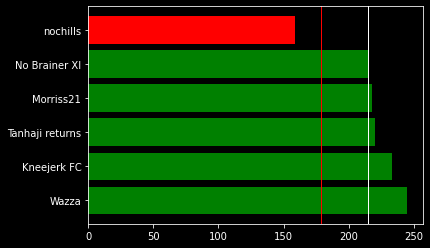

In [20]:
def get_horizontal_bar_chart(league):
    players = league.getPlayers()
    names = []
    points = []
    colors = []
    total_points = 0
    average_score = get_average_score(get_static_event_data())
    for player in players:
        point = player.get_points()
        total_points = total_points + point
        names.append(player.get_name())
        points.append(point)
        if point > average_score:
            colors.append('green')
        elif point < average_score:
            colors.append('red')
        else:
            colors.append('blue')
    avg_league_points = total_points/len(points)
    y_pos = np.arange(len(points))
    fig, ax = plt.subplots()
    plt.style.use('dark_background')
    ax.axvline(average_score, color='red', linewidth=1)
    ax.axvline(avg_league_points, color='white', linewidth=1)
    #ax.set_title("'dark_background' style sheet")
    plt.barh(y_pos, points, color = colors)
    plt.yticks(y_pos, names)
    plt.show()

get_horizontal_bar_chart(league_data)